# Data Cleaning & Standarization

## Importing data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('regression_data.xls')
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


## Checking Null Values

In [6]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [7]:
df.notnull().sum() # We haven't detected null values in any columns

id               21597
date             21597
bedrooms         21597
bathrooms        21597
sqft_living      21597
sqft_lot         21597
floors           21597
waterfront       21597
view             21597
condition        21597
grade            21597
sqft_above       21597
sqft_basement    21597
yr_built         21597
yr_renovated     21597
zipcode          21597
lat              21597
long             21597
sqft_living15    21597
sqft_lot15       21597
price            21597
dtype: int64

In [8]:
df.id.duplicated().sum() #checking how many duplicated ids(Houses) are there in the Data set

177

In [9]:
df.duplicated().sum() #Checking if there are duplicated rows. There are not any identical rows so the duplicated Ids may have some difference. 

0

In [10]:
df.loc[df.id.duplicated(),:].sort_values(by=['id']) # We check all the duplicated Ids in the Dataframe

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
12406,123039336,2014-12-08,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,244900
7786,251300110,2015-01-14,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,358000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,2015-02-26,3,1.75,1510,8400,1.0,0,0,2,7,980,530,1979,0,98045,47.4476,-121.771,1500,10125,322000
4918,9809000020,2015-03-13,5,2.25,3120,16672,2.0,0,0,4,9,3120,0,1969,0,98004,47.6458,-122.219,3740,17853,1940000
6340,9828200460,2015-01-06,2,1.00,700,4800,1.0,0,0,3,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800,430000
15186,9834200305,2015-02-10,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000


In [11]:
df.loc[df['id']==7853400250]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20164,7853400250,2014-06-04,4,3.5,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,610000
20165,7853400250,2015-02-19,4,3.5,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000


In [12]:
df=df.sort_values('date')

In [13]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7316,2202500290,2014-05-02,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
20586,7853361370,2014-05-02,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
1040,7197300105,2014-05-02,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
20543,3438501320,2014-05-02,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
9587,472000620,2014-05-02,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,98116,47.5607,-122.391,1810,5850,725000
12623,4166600610,2015-05-14,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,98023,47.3273,-122.370,2950,29152,335000
5632,7923600250,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000
13040,5101400871,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500


In [14]:
df2 = df.drop('price', axis=1)

In [15]:
df2.duplicated().sum()

0

In [16]:
pd.set_option("display.max_rows", None)
df[df.duplicated(['id'], keep=False)].sort_values(by=['id'])

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2494,1000102,2014-09-16,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
16800,7200179,2014-10-16,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11421,109200390,2014-08-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,245000
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
12406,123039336,2014-12-08,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,244900
12405,123039336,2014-06-11,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,148000
7785,251300110,2014-07-31,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,225000
7786,251300110,2015-01-14,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,358000


In [17]:
df_dupl=df[df.duplicated(['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade', 'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15'], keep=False)].sort_values(by=['id'])


In [18]:
df=df.drop_duplicates( subset=['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade', 'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15'],keep='last')

In [19]:
df.info() # After checking the duplicate rows we decided to keep the rows with the last date. Besides price and date, there is no other id that has difference in it's  values.  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7316 to 16580
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  float64       
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  float64       
 7   waterfront     21420 non-null  int64         
 8   view           21420 non-null  int64         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int64         
 15  zipcode        2

In [20]:
df.loc[df['id']==1000102]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.0,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000


In [21]:
df.loc[df['id']==7200179]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
16801,7200179,2015-04-24,2,1.0,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.484,-122.211,1480,6969,175000


In [22]:
df.loc[df['id']==109200390]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000


# Pre-processing

## Checking data types

In [23]:
df['bathrooms']=df['bathrooms'].astype(int) # Python by default floors the integer

In [24]:
df['floors']=df['floors'].astype(int)

In [25]:
df.head(25)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7316,2202500290,2014-05-02,4,1,1450,8800,1,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
20586,7853361370,2014-05-02,4,2,3310,6500,2,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
1040,7197300105,2014-05-02,4,2,1940,10500,1,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
20543,3438501320,2014-05-02,2,2,1630,1368,2,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
9587,472000620,2014-05-02,3,2,2600,4750,1,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000
9578,1024069009,2014-05-02,5,2,2820,67518,2,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351,675000
11879,7305300695,2014-05-02,4,2,2820,8408,2,0,0,3,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408,625000
11895,3221059036,2014-05-02,4,2,3630,42884,1,0,0,3,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148,400000
4959,7525000080,2014-05-02,3,1,2330,14892,1,0,0,3,8,1970,360,1980,0,98074,47.6267,-122.046,2570,14217,588500
3719,7739100015,2014-05-02,3,1,1710,7320,1,0,0,3,7,1710,0,1948,0,98155,47.7512,-122.281,2260,8839,463000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7316 to 16580
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  int32         
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  int32         
 7   waterfront     21420 non-null  int64         
 8   view           21420 non-null  int64         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int64         
 15  zipcode        2

In [27]:
df=df.drop(['id'],axis=1)

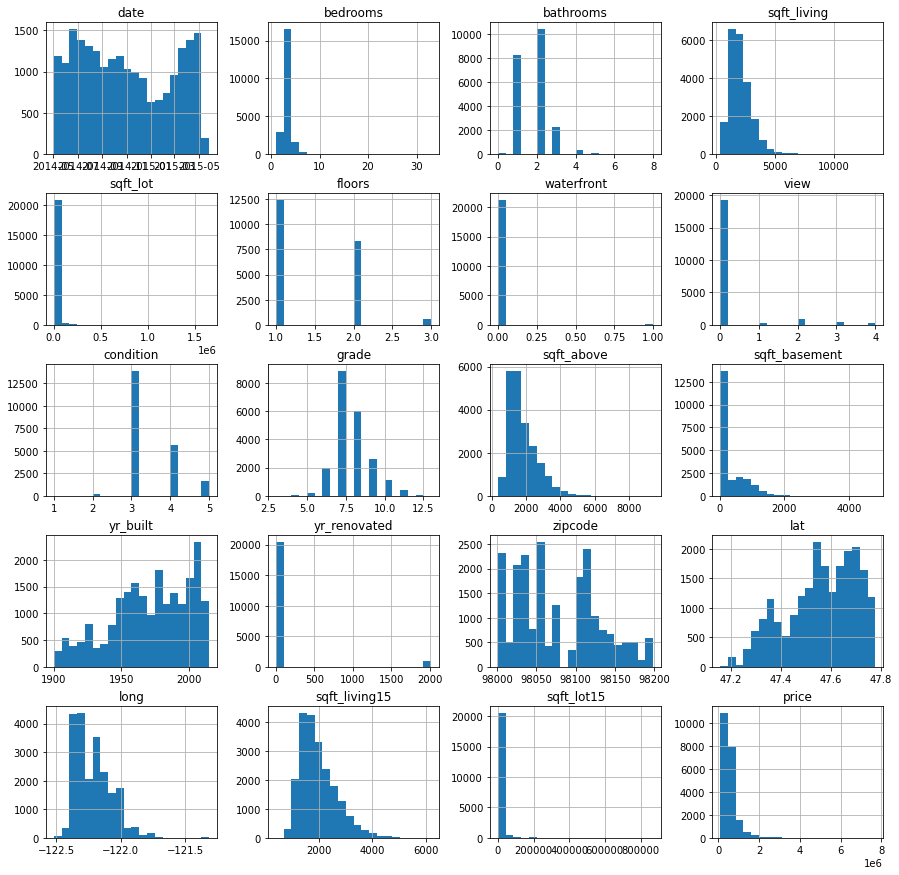

In [28]:
df.hist(figsize=(15,15),bins=20,layout=(5,4));

array([[<AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

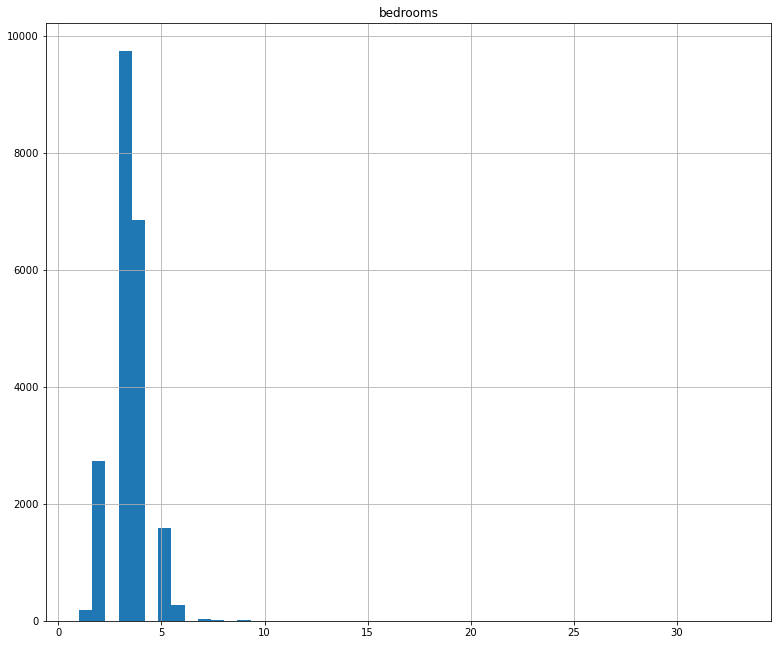

In [29]:
df.hist(['bedrooms'], figsize=(13,11),bins=50)

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

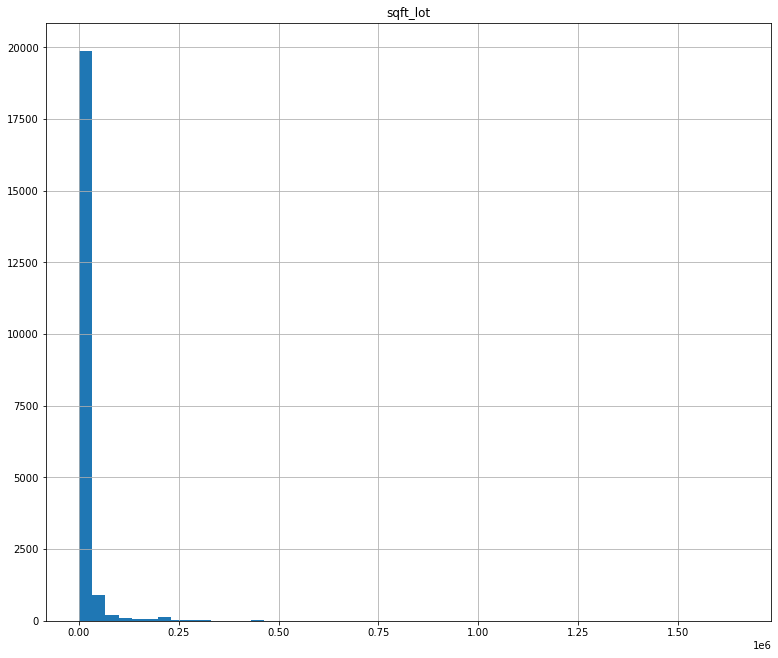

In [30]:
df.hist(['sqft_lot'], figsize=(13,11),bins=50)

array([[<AxesSubplot:title={'center':'floors'}>]], dtype=object)

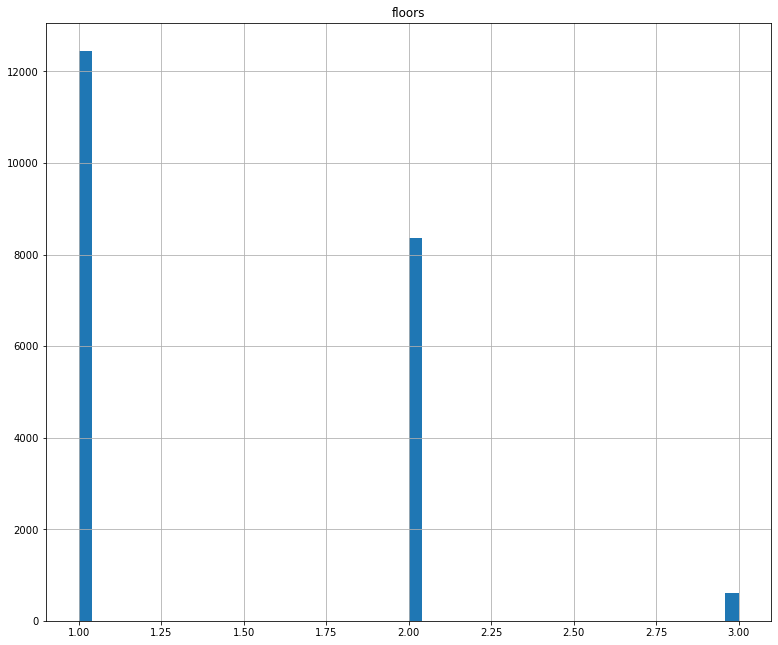

In [31]:
df.hist(['floors'], figsize=(13,11),bins=50)

In [32]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,3.373950,1.752614,2083.132633,1.512804e+04,1.447993,0.007610,0.235107,3.410784,7.662792,1791.170215,291.962418,1971.092997,84.793091,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,5.418614e+05
std,0.925405,0.734016,918.808412,4.153080e+04,0.552110,0.086903,0.767165,0.650035,1.171971,828.692965,442.875502,29.387141,402.574626,53.47748,0.138589,0.140791,685.537057,27345.621867,3.675569e+05
min,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.000000,2.000000,1920.000000,7.614000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,4.505500e+05
75%,4.000000,2.000000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [33]:
df.sort_values(by=['bedrooms']).tail(10) 
# After checking visually, statistically and logically we assume that the maximun value of bedrooms is an outlier 
# and we think that's a typo since the price, the number of bathrooms is not coherent with so many bedrooms. 
# Probably we thought it is a 3 bedroom house instead of 33.

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
16830,2015-03-17,9,4,4620,5508,2,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,1400000
4231,2015-01-06,9,3,3680,4400,2,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,700000
6073,2014-08-08,9,4,3650,5000,2,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,1280000
8537,2014-08-11,9,7,4050,6504,2,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,450000
18428,2015-03-13,9,3,2820,4480,2,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400,934000
13301,2014-08-14,10,5,4590,10920,1,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
19239,2014-12-29,10,3,2920,3745,2,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000
15147,2014-10-29,10,2,3610,11914,2,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
8748,2014-08-21,11,3,3000,4960,2,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
15856,2014-06-25,33,1,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [34]:
df.sort_values(by=['bathrooms']).tail(10) 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
4031,2014-10-07,8,6,4340,9415,2,0,0,3,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100,2150000
19133,2014-10-11,5,6,5490,19897,2,0,0,3,12,5490,0,2005,0,98039,47.6165,-122.236,2910,17600,3640000
21034,2015-02-19,5,6,7120,40806,2,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859,900000
4020,2014-10-07,7,6,7480,41664,2,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,800000
20562,2015-03-28,6,6,6260,10955,2,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550,1180000
12358,2015-05-06,5,6,7440,21540,2,0,0,3,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329,4210000
9245,2014-09-19,6,7,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
8537,2014-08-11,9,7,4050,6504,2,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,450000
7245,2014-10-13,6,8,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,2014-05-05,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


In [35]:
df.sort_values(by=['sqft_living']).tail(10) 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1446,2015-04-13,5,5,8000,23985,2,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
1162,2014-10-20,5,5,8010,45517,2,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,5110000
18288,2014-07-02,5,6,8020,21738,2,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969,3300000
14542,2014-06-11,5,6,8670,64033,2,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,2890000
4407,2014-08-04,5,5,9200,35069,2,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
8085,2014-06-17,5,6,9640,13068,1,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4670000
9245,2014-09-19,6,7,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
3910,2014-06-11,5,4,10040,37325,2,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
7245,2014-10-13,6,8,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,2014-05-05,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


In [36]:
df[df['zipcode']==98053].sort_values('price') #We checked the Zip code because the biggest sqft_living house was 
# cheaper than other similar in some features. We therefore checked the houses of that Zipcode 
# and we realised that in the district that house was the most expensive so we assume that is not an outlier 
# and that is a correct value.  

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
11784,2014-06-30,2,1,1200,24792,2,0,0,2,7,1200,0,1976,0,98053,47.6337,-121.961,2150,24792,170000
18910,2014-05-21,2,1,1396,111949,1,0,0,3,7,1396,0,1940,1997,98053,47.6374,-122.007,2020,111949,225000
11516,2014-05-12,2,1,1290,2828,2,0,0,3,7,1290,0,2008,0,98053,47.6968,-122.025,1290,2628,265000
6231,2015-04-29,2,1,1290,2482,2,0,0,3,7,1290,0,2008,0,98053,47.6972,-122.025,1290,2482,300000
20490,2015-01-08,2,1,1290,3383,2,0,0,3,7,1290,0,2008,0,98053,47.6968,-122.025,1290,2828,305000
2009,2014-12-17,2,1,1290,3140,2,0,0,3,7,1290,0,2008,0,98053,47.6971,-122.026,1290,2628,305000
18879,2015-05-08,4,1,2120,46173,2,0,0,3,7,2120,0,1974,0,98053,47.6503,-121.968,2000,46173,316000
1991,2015-03-25,3,1,1230,9660,1,0,0,3,7,1230,0,1968,0,98053,47.6829,-122.060,1380,10125,322000
17038,2014-08-21,3,1,1300,8800,1,0,0,3,7,1300,0,1977,0,98053,47.6400,-121.966,1600,12210,326188
15865,2014-12-17,3,1,910,10240,1,0,0,4,6,910,0,1969,0,98053,47.6729,-122.064,1140,10720,330000


In [37]:
df.sort_values(by=['sqft_lot']).tail(10) 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20436,2015-04-15,4,5,6530,871200,2,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132,1600000
9705,2015-01-07,4,4,5545,871200,2,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200,937500
7070,2015-01-05,4,3,3920,881654,3,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384,1650000
6685,2015-03-20,2,2,3900,920423,2,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962,2000000
4437,2014-07-30,2,3,2560,982278,1,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946,790000
3945,2014-09-05,4,3,3770,982998,2,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141,998000
7762,2015-01-19,4,3,4030,1024068,2,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700,855000
7640,2014-05-21,5,3,3010,1074218,1,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,542500
17305,2015-05-04,2,1,710,1164794,1,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730,190000
1717,2015-03-27,4,1,1300,1651359,1,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,700000


## Check useless columns

In [38]:
corr_df=df.drop(['date','lat','long','yr_built','zipcode','yr_renovated','sqft_above','sqft_basement'], axis=1)

In [39]:
#Correlation Matrix

corre_matrix=corr_df.corr()
corre_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.466734,0.579069,0.032490,0.158138,-0.006940,0.080019,0.025893,0.357988,0.394949,0.030570,0.309640
bathrooms,0.466734,1.000000,0.698363,0.085400,0.485577,0.058790,0.176667,-0.129578,0.607206,0.510674,0.081539,0.510152
sqft_living,0.579069,0.698363,1.000000,0.172586,0.352209,0.103938,0.283851,-0.061677,0.762477,0.756186,0.183837,0.701295
sqft_lot,0.032490,0.085400,0.172586,1.000000,-0.009474,0.021599,0.075203,-0.009169,0.113656,0.143805,0.717743,0.088789
floors,0.158138,0.485577,0.352209,-0.009474,1.000000,0.019439,0.022697,-0.296456,0.472307,0.295558,-0.013561,0.235128
waterfront,-0.006940,0.058790,0.103938,0.021599,0.019439,1.000000,0.403140,0.016564,0.082955,0.086602,0.030772,0.266995
view,0.080019,0.176667,0.283851,0.075203,0.022697,0.403140,1.000000,0.045059,0.250298,0.279320,0.073199,0.396683
condition,0.025893,-0.129578,-0.061677,-0.009169,-0.296456,0.016564,0.045059,1.000000,-0.150508,-0.095256,-0.003450,0.034219
grade,0.357988,0.607206,0.762477,0.113656,0.472307,0.082955,0.250298,-0.150508,1.000000,0.713178,0.120056,0.666835
sqft_living15,0.394949,0.510674,0.756186,0.143805,0.295558,0.086602,0.279320,-0.095256,0.713178,1.000000,0.182765,0.583792


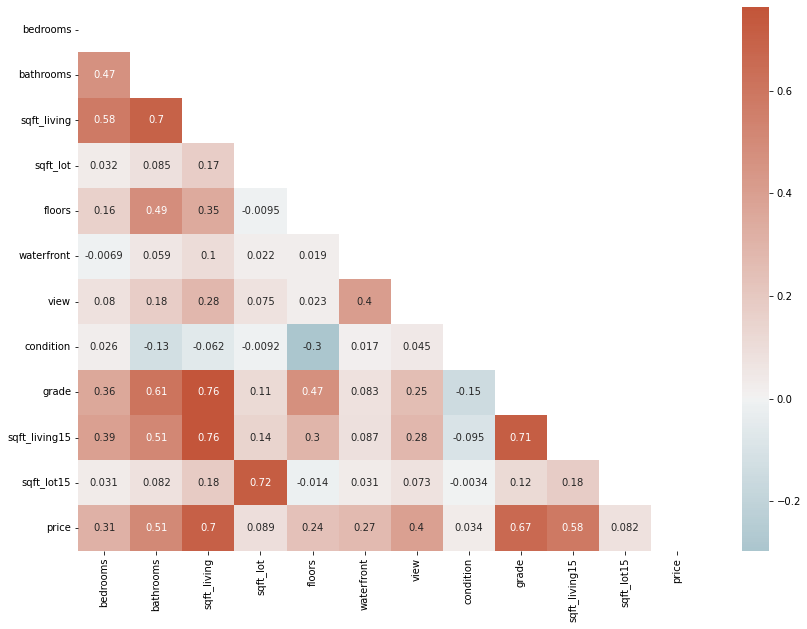

In [40]:
#Heatmap
import matplotlib.pyplot as plt 
import seaborn as sns

mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(14,10))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True,);

In [41]:
# checking the independent variables in front of the target variable (price) we can see some multicollinearity 
# between some of them, like sqft_above and sqft_living, or sqft_above and sqft_living15, or sqft_lot and sqft_living15.   

In [49]:
# TESTING-ADAPTING

# X = df.drop(columns='price')
# y = df.price

# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_val_predict

# classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
# y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# sfs1 = SFS(classifier_pipeline,
#            k_features=1,
#            forward=False,
#            scoring='neg_mean_squared_error',
#            cv=5)
# X = df.drop(columns='price')
# sfs1.fit(X,y)
# sfs1.subsets_